<a href="https://colab.research.google.com/github/tamaravera14/SIMULACI-N-I/blob/main/Metodo_de_aceptacion_y_rechazo_TABV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de aceptación y rechazo
## DISTRIBUCIÓN TRIANGULAR
### Tamara Alheli Bazaldua Vera

**Debe tener un máximo (M) y estar acotada ( [a,b] ).**

---
**PASOS:**
1. Generar dos números aleatorios $R_1, R_2$.
2. Determinar x:
$$x = a + (b-a) R_1$$
3. Evaluar $f$ en $x$.
4. Si:
$$
\begin{cases}
\text{Aceptar x, si}  &  R_2 \leq \frac{f(x)}{M}\\
\text{Rechazar x, si} & \text{otro caso}
\end{cases} $$

**Nota: A mayor M, menor aceptación.**

---

Al tener la restricción de $ \frac{f(x)}{M}$, es **menos eficaz** que el de transformada inversa.

**Ejercicio:**

Sea la funcion:
$$ f(x) =
\begin{cases}
\frac{2(x-a)}{(c-a)(b-a)} & \text{si } a \leq x \leq b \\
\frac{2(c-x)}{(c-a)(b-c)} & \text{si } b < x \leq c
\end{cases} $$
Calculando la $F(x)$, tenemos:
$$ F(x) = \begin{cases}
\frac{(x-a)^2}{(c-a)(b-a)} & \text{si } a \leq x \leq b \\
1 - \frac{(c-x)^2}{(c-a)(b-c)} & \text{si } b < x \leq c
\end{cases} $$

---
Con:
$$\mu_x = \frac{a+b+c}{3}$$
$$\sigma_{x}^2 = \frac{a^2+b^2+c^2-ab-ac-bc}{18}$$

---

Librerias a usar

In [4]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np
import math

Declaracion de variables globales

In [12]:
a = 1
b = 3
c = 5
M = 2/(c-a)
mu = (a+b+c)/3
sigma = ((a**2+b**2+c**2-a*b-a*c-b*c)/18)
n = 100000

Funcion $f(x)$ a utilizar

In [13]:
def f(x):
  if a <= x <= b:
    return (2*(x-a))/((c-a)*(b-a))
  elif b < x <= c:
    return (2*(c-x))/((c-a)*(c-b))
  else:
    return 0

Función del experimento con el ***Método de aceptación y rechazo***

In [14]:
def aceptacion(n):
  lista = []
  for _ in range(n):
    R1 = rd.random()
    R2 = rd.random()
    x = (c-a)*R1 + a
    if R2 <= f(x)/M:
      lista.append(x)
  return lista

Asigancion de la lista de los valores obtenidos para x

In [15]:
metodo = aceptacion(n)

Grafica del histograma con los valores obtenidos, debe ser similar a $f(x)$

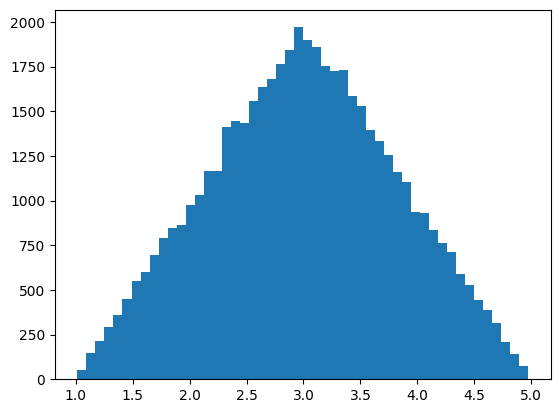

In [16]:
plt.hist(metodo, bins=50)
plt.show()

**Calculo de la media estimada y comparacion con la real.**

In [17]:
print("Media estimada: ", np.mean(metodo))
print("Media exacta: ", mu)
print("Error de media con respecto a la real:", abs(mu-np.mean(metodo)))

Media estimada:  2.9985054393604655
Media exacta:  3.0
Error de media con respecto a la real: 0.001494560639534459


**Calculo de la varianza estimada y comparacion con la real.**

In [18]:
print("Varianza estimada: ", np.var(metodo))
print("Varianza exacta: ", sigma)
print("Error de varianza con respecto a la real:", abs(sigma-np.var(metodo)))

Varianza estimada:  0.6662362364271005
Varianza exacta:  0.6666666666666666
Error de varianza con respecto a la real: 0.00043043023956612636


**Periodo de aceptación es decir de la cantidad de elementos generados, solo fueron admitidos una parte.**

In [20]:
print("Periodo de aceptacion: ", len(metodo), "de", n)

Periodo de aceptacion:  50140 de 100000
